In [2]:
#Mie Scattering of a Gold Sphere

import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import Au

r = 1.0  # radius of sphere

wvl_min = 2 * np.pi * r / 10
wvl_max = 2 * np.pi * r / 2

frq_min = 1 / wvl_max
frq_max = 1 / wvl_min
frq_cen = 0.5 * (frq_min + frq_max)
dfrq = frq_max - frq_min
nfrq = 100

## at least 8 pixels per smallest wavelength, i.e. np.floor(8/wvl_min)
resolution = 50

dpml = 0.5 * wvl_max
dair = 0.5 * wvl_max

pml_layers = [mp.PML(thickness=dpml)]

symmetries = [mp.Mirror(mp.Y), mp.Mirror(mp.Z, phase=-1)]

s = 2 * (dpml + dair + r)
cell_size = mp.Vector3(s, s, s)

# is_integrated=True necessary for any planewave source extending into PML
sources = [
    mp.Source(
        mp.GaussianSource(frq_cen, fwidth=dfrq, is_integrated=True),
        center=mp.Vector3(-0.5 * s + dpml),
        size=mp.Vector3(0, s, s),
        component=mp.Ez,
    )
]

sim = mp.Simulation(
    resolution=resolution,
    cell_size=cell_size,
    boundary_layers=pml_layers,
    sources=sources,
    k_point=mp.Vector3(),
    symmetries=symmetries,
)

box_x1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(x=-r), size=mp.Vector3(0, 2 * r, 2 * r)),
)
box_x2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(x=+r), size=mp.Vector3(0, 2 * r, 2 * r)),
)
box_y1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(y=-r), size=mp.Vector3(2 * r, 0, 2 * r)),
)
box_y2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(y=+r), size=mp.Vector3(2 * r, 0, 2 * r)),
)
box_z1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(z=-r), size=mp.Vector3(2 * r, 2 * r, 0)),
)
box_z2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(z=+r), size=mp.Vector3(2 * r, 2 * r, 0)),
)

sim.run(until_after_sources=10)

freqs = mp.get_flux_freqs(box_x1)
box_x1_data = sim.get_flux_data(box_x1)
box_x2_data = sim.get_flux_data(box_x2)
box_y1_data = sim.get_flux_data(box_y1)
box_y2_data = sim.get_flux_data(box_y2)
box_z1_data = sim.get_flux_data(box_z1)
box_z2_data = sim.get_flux_data(box_z2)

box_x1_flux0 = mp.get_fluxes(box_x1)

sim.reset_meep()







n_sphere = 2.0
geometry = [mp.Sphere(material=mp.Medium(index=n_sphere), center=mp.Vector3(), radius=r)
           ]

sim = mp.Simulation(
    resolution=resolution,
    cell_size=cell_size,
    boundary_layers=pml_layers,
    sources=sources,
    k_point=mp.Vector3(),
    symmetries=symmetries,
    geometry=geometry,
)

box_x1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(x=-r), size=mp.Vector3(0, 2 * r, 2 * r)),
)
box_x2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(x=+r), size=mp.Vector3(0, 2 * r, 2 * r)),
)
box_y1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(y=-r), size=mp.Vector3(2 * r, 0, 2 * r)),
)
box_y2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(y=+r), size=mp.Vector3(2 * r, 0, 2 * r)),
)
box_z1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(z=-r), size=mp.Vector3(2 * r, 2 * r, 0)),
)
box_z2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(z=+r), size=mp.Vector3(2 * r, 2 * r, 0)),
)

sim.load_minus_flux_data(box_x1, box_x1_data)
sim.load_minus_flux_data(box_x2, box_x2_data)
sim.load_minus_flux_data(box_y1, box_y1_data)
sim.load_minus_flux_data(box_y2, box_y2_data)
sim.load_minus_flux_data(box_z1, box_z1_data)
sim.load_minus_flux_data(box_z2, box_z2_data)

sim.run(until_after_sources=100)

box_x1_flux = mp.get_fluxes(box_x1)
box_x2_flux = mp.get_fluxes(box_x2)
box_y1_flux = mp.get_fluxes(box_y1)
box_y2_flux = mp.get_fluxes(box_y2)
box_z1_flux = mp.get_fluxes(box_z1)
box_z2_flux = mp.get_fluxes(box_z2)

scatt_flux = (
    np.asarray(box_x1_flux)
    - np.asarray(box_x2_flux)
    + np.asarray(box_y1_flux)
    - np.asarray(box_y2_flux)
    + np.asarray(box_z1_flux)
    - np.asarray(box_z2_flux)
)

#intensity = np.asarray(box_x1_flux0) / (2 * r) ** 2
#scatt_cross_section = np.divide(scatt_flux, intensity)
#scatt_eff = scatt_cross_section * -1 / (np.pi * r**2)


ModuleNotFoundError: No module named 'meep'

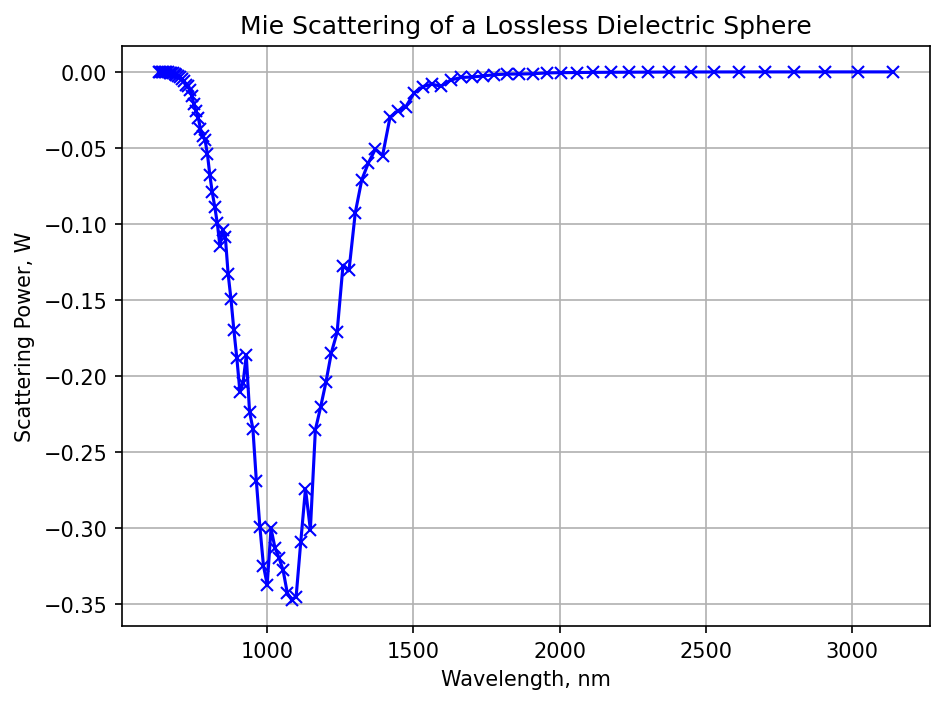

In [3]:
#Plot the scattering efficiency against the spectrum of frequencies we sent toward the sphere:

plt.figure(dpi=150) #dpi is dots per inch. Just changes the resolution of the image of the plot.

#We'll plot wavelength.
#We'll also use a logged scale for both x and y axes (loglog).
plt.plot(1E3/np.asarray(freqs), scatt_flux, "bx-")
plt.grid(True, which="both", ls="-")
plt.xlabel("Wavelength, nm")
plt.ylabel("Scattering Power, W")
plt.title("Mie Scattering of a Lossless Dielectric Sphere")
plt.tight_layout()
plt.savefig(fname="Mie Scattering of a Lossless Dielectric Sphere",
            dpi=150, 
            bbox_inches="tight")
plt.show()

In [1]:
#Now for gold

import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from scipy.optimize import minimize

#Au material script from complex refractive index data

wvl_data = np.array([250.000000, 260.000000, 270.000000, 280.000000, 290.000000, 300.000000,
                              310.000000, 320.000000, 330.000000, 340.000000, 350.000000, 360.000000,
                              370.000000, 380.000000, 390.000000, 400.000000, 410.000000, 420.000000,
                              430.000000, 440.000000, 450.000000, 460.000000, 470.000000, 480.000000,
                              490.000000, 500.000000, 510.000000, 520.000000, 530.000000, 540.000000,
                              550.000000, 560.000000, 570.000000, 580.000000, 590.000000, 600.000000,
                              610.000000, 620.000000, 630.000000, 640.000000, 650.000000, 660.000000,
                              670.000000, 680.000000, 690.000000, 700.000000, 710.000000, 720.000000,
                              730.000000, 740.000000, 750.000000, 760.000000, 770.000000, 780.000000,
                              790.000000, 800.000000, 810.000000, 820.000000, 830.000000, 840.000000,
                              850.000000, 860.000000, 870.000000, 880.000000, 890.000000, 900.000000,
                              910.000000, 920.000000, 930.000000, 940.000000, 950.000000, 960.000000,
                              970.000000, 980.000000, 990.000000, 1000.000000])

#Refractive index data
n_data = np.array([1.486293, 1.517101, 1.602219, 1.678100, 1.750429, 1.800042, 1.830000, 1.836011,
                   1.813111, 1.781199, 1.751161, 1.726732, 1.706249, 1.687926, 1.670782, 1.658000,
                   1.641467, 1.626593, 1.607286, 1.572004, 1.503407, 1.417996, 1.315496, 1.189871,
                   1.018554, 0.849238, 0.698231, 0.571152, 0.475555, 0.397920, 0.355713, 0.318417,
                   0.295010, 0.278152, 0.261664, 0.245531, 0.229740, 0.214278, 0.199131, 0.184288,
                   0.169737, 0.164060, 0.162125, 0.160792, 0.160087, 0.160906, 0.161863, 0.162930,
                   0.164154, 0.166357, 0.168557, 0.170750, 0.172934, 0.175425, 0.178189, 0.180917,
                   0.183609, 0.186265, 0.189334, 0.193206, 0.197006, 0.200737, 0.204403, 0.208008,
                   0.211773, 0.215750, 0.219658, 0.223500, 0.227279, 0.230997, 0.234659, 0.239028,
                   0.243770, 0.248435, 0.253026, 0.257546])

#Absorption coefficient data (imaginary coefficient of complex refractive index)
k_data = np.array([1.660980, 1.759202, 1.824512, 1.873471, 1.904443, 1.919298, 1.916000, 1.897531,
                   1.870450, 1.852625, 1.847116, 1.855697, 1.883198, 1.916907, 1.939990, 1.956000,
                   1.957488, 1.949527, 1.934151, 1.910625, 1.878436, 1.843614, 1.814717, 1.799925,
                   1.820950, 1.892178, 2.027084, 2.185897, 2.374957, 2.553141, 2.695668, 2.832206,
                   2.899935, 2.930925, 2.961718, 2.992315, 3.022714, 3.052916, 3.082919, 3.112725,
                   3.142334, 3.293285, 3.477580, 3.652616, 3.817434, 3.959739, 4.097111, 4.230027,
                   4.358280, 4.474892, 4.588542, 4.699445, 4.807792, 4.914824, 5.020584, 5.124162,
                   5.225688, 5.325278, 5.419440, 5.505117, 5.589481, 5.672590, 5.754499, 5.835259,
                   5.919898, 6.009588, 6.097960, 6.185070, 6.270970, 6.355709, 6.439333, 6.519685,
                   6.597783, 6.674968, 6.751271, 6.826722])


#Fit the data to Lorentz Function and generate Au material

def lorentzfunc(p: np.ndarray, x: np.ndarray) -> np.ndarray:
    """
    Returns the complex ε profile given a set of Lorentzian parameters p
    (σ_0, ω_0, γ_0, σ_1, ω_1, γ_1, ...) for a set of frequencies x.
    """
    N = len(p) // 3
    y = np.zeros(len(x))
    for n in range(N):
        A_n, x_n, g_n = p[3 * n : 3 * n + 3]
        y = y + A_n / (np.square(x_n) - np.square(x) - 1j * x * g_n)
    return y


def lorentzerr(p: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    """
    Returns the error (or residual or loss) as the L2 norm
    of the difference of ε(p,x) and y over a set of frequencies x.
    """
    yp = lorentzfunc(p, x)
    val = np.sum(np.square(abs(y - yp)))
    return val


def lorentzfit(
    p0: np.ndarray,
    x: np.ndarray,
    y: np.ndarray,
    tol: float = 1e-25,
    maxeval: float = 10000,
) -> Tuple[np.ndarray, float]:
    """
    Returns the optimal Lorentzian polarizability parameters and error
    which minimize the error in ε(p0,x) relative to y for an initial
    set of Lorentzian polarizability parameters p0 over a set of
    frequencies x using the scipy.optimize algorithm for a relative
    tolerance tol and a maximum number of iterations maxeval.
    """
    result = minimize(
        lambda p: lorentzerr(p, x, y),
        p0,
        method="L-BFGS-B",
        options={"ftol": tol, "maxiter": maxeval},
    )
    popt = result.x
    minf = result.fun
    return popt, minf


if __name__ == "__main__":
    
    n = n_data[:] + 1j * k_data[:]
    eps_inf = 1.1

    eps = np.square(n) - eps_inf

    wl = wvl_data[:]
    wl_min = 250  # minimum wavelength (units of nm)
    wl_max = 1000  # maximum wavelength (units of nm)
    start_idx = np.where(wl > wl_min)
    idx_start = start_idx[0][0]
    end_idx = np.where(wl < wl_max)
    idx_end = end_idx[0][-1] + 1

    # The fitting function is ε(f) where f is the frequency, rather than ε(λ).
    freqs = 1000 / wl  # units of 1/μm
    freqs_reduced = freqs[idx_start:idx_end]
    wl_reduced = wl[idx_start:idx_end]
    eps_reduced = eps[idx_start:idx_end]

    # Fitting parameter: number of Lorentzian terms to use in the fit
    num_lorentzians = 2

    # Number of times to repeat local optimization with random initial values.
    num_repeat = 30

    ps = np.zeros((num_repeat, 3 * num_lorentzians))
    mins = np.zeros(num_repeat)
    for m in range(num_repeat):
        # Initial values for the Lorentzian polarizability terms. Each term
        # consists of three parameters (σ, ω, γ) and is chosen randomly.
        # Note: for the case of no absorption, γ should be set to zero.
        p_rand = [10 ** (np.random.random()) for _ in range(3 * num_lorentzians)]
        ps[m, :], mins[m] = lorentzfit(p_rand, freqs_reduced, eps_reduced, 1e-25, 50000)
        ps_str = "( " + ", ".join(f"{prm:.4f}" for prm in ps[m, :]) + " )"
        print(f"iteration:, {m:3d}, ps_str, {mins[m]:.6f}")

    # Find the best performing set of parameters.
    idx_opt = np.argmin(mins)
    popt_str = "( " + ", ".join(f"{prm:.4f}" for prm in ps[idx_opt]) + " )"
    print(f"optimal:, {popt_str}, {mins[idx_opt]:.6f}")

    # Define a `Medium` class object using the optimal fitting parameters.
    E_susceptibilities = []

    for n in range(num_lorentzians):
        mymaterial_freq, mymaterial_gamma = ps[idx_opt][3 * n + 1:3 * n + 3]

        if mymaterial_freq == 0:
            mymaterial_sigma = ps[idx_opt][3 * n + 0] / 1.0**2
            E_susceptibilities.append(
                mp.DrudeSusceptibility(
                    frequency=1.0, gamma=mymaterial_gamma, sigma=mymaterial_sigma
                )
            )
        else:
            mymaterial_sigma = ps[idx_opt][3 * n + 0] / mymaterial_freq**2
            E_susceptibilities.append(
                mp.LorentzianSusceptibility(
                    frequency=mymaterial_freq,
                    gamma=mymaterial_gamma,
                    sigma=mymaterial_sigma,
                )
            )

    Au = mp.Medium(epsilon=eps_inf, E_susceptibilities=E_susceptibilities)
    

ModuleNotFoundError: No module named 'meep'

In [2]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import Au

r = 50E-3  # radius of sphere

wvl_min = 300E-3
wvl_max = 800E-3

frq_min = 1 / wvl_max
frq_max = 1 / wvl_min
frq_cen = 0.5 * (frq_min + frq_max)
dfrq = frq_max - frq_min
nfrq = 100

## at least 8 pixels per smallest wavelength, i.e. np.floor(8/wvl_min)
resolution = 25/r

dpml = 2*r
dair = 2*r

pml_layers = [mp.PML(thickness=dpml)]

symmetries = [mp.Mirror(mp.Y), mp.Mirror(mp.Z, phase=-1)]

s = 2 * (dpml + dair + r)
cell_size = mp.Vector3(s, s, s)

# is_integrated=True necessary for any planewave source extending into PML
sources = [
    mp.Source(
        mp.GaussianSource(frq_cen, fwidth=dfrq, is_integrated=True),
        center=mp.Vector3(-0.5 * s + dpml),
        size=mp.Vector3(0, s, s),
        component=mp.Ez,
    )
]

sim = mp.Simulation(
    resolution=resolution,
    cell_size=cell_size,
    boundary_layers=pml_layers,
    sources=sources,
    k_point=mp.Vector3(),
    symmetries=symmetries,
)

box_x1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(x=-r), size=mp.Vector3(0, 2 * r, 2 * r)),
)
box_x2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(x=+r), size=mp.Vector3(0, 2 * r, 2 * r)),
)
box_y1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(y=-r), size=mp.Vector3(2 * r, 0, 2 * r)),
)
box_y2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(y=+r), size=mp.Vector3(2 * r, 0, 2 * r)),
)
box_z1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(z=-r), size=mp.Vector3(2 * r, 2 * r, 0)),
)
box_z2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(z=+r), size=mp.Vector3(2 * r, 2 * r, 0)),
)

sim.run(until_after_sources=10)

freqs = mp.get_flux_freqs(box_x1)
box_x1_data = sim.get_flux_data(box_x1)
box_x2_data = sim.get_flux_data(box_x2)
box_y1_data = sim.get_flux_data(box_y1)
box_y2_data = sim.get_flux_data(box_y2)
box_z1_data = sim.get_flux_data(box_z1)
box_z2_data = sim.get_flux_data(box_z2)

box_x1_flux0 = mp.get_fluxes(box_x1)

sim.reset_meep()







geometry = [mp.Sphere(material=Au, center=mp.Vector3(), radius=r)
           ]

sim = mp.Simulation(
    resolution=resolution,
    cell_size=cell_size,
    boundary_layers=pml_layers,
    sources=sources,
    k_point=mp.Vector3(),
    symmetries=symmetries,
    geometry=geometry,
)

box_x1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(x=-r), size=mp.Vector3(0, 2 * r, 2 * r)),
)
box_x2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(x=+r), size=mp.Vector3(0, 2 * r, 2 * r)),
)
box_y1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(y=-r), size=mp.Vector3(2 * r, 0, 2 * r)),
)
box_y2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(y=+r), size=mp.Vector3(2 * r, 0, 2 * r)),
)
box_z1 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(z=-r), size=mp.Vector3(2 * r, 2 * r, 0)),
)
box_z2 = sim.add_flux(
    frq_cen,
    dfrq,
    nfrq,
    mp.FluxRegion(center=mp.Vector3(z=+r), size=mp.Vector3(2 * r, 2 * r, 0)),
)

sim.load_minus_flux_data(box_x1, box_x1_data)
sim.load_minus_flux_data(box_x2, box_x2_data)
sim.load_minus_flux_data(box_y1, box_y1_data)
sim.load_minus_flux_data(box_y2, box_y2_data)
sim.load_minus_flux_data(box_z1, box_z1_data)
sim.load_minus_flux_data(box_z2, box_z2_data)

sim.run(until_after_sources=100)

box_x1_flux = mp.get_fluxes(box_x1)
box_x2_flux = mp.get_fluxes(box_x2)
box_y1_flux = mp.get_fluxes(box_y1)
box_y2_flux = mp.get_fluxes(box_y2)
box_z1_flux = mp.get_fluxes(box_z1)
box_z2_flux = mp.get_fluxes(box_z2)

scatt_flux = (
    np.asarray(box_x1_flux)
    - np.asarray(box_x2_flux)
    + np.asarray(box_y1_flux)
    - np.asarray(box_y2_flux)
    + np.asarray(box_z1_flux)
    - np.asarray(box_z2_flux)
)

#intensity = np.asarray(box_x1_flux0) / (2 * r) ** 2
#scatt_cross_section = np.divide(scatt_flux, intensity)
#scatt_eff = scatt_cross_section * -1 / (np.pi * r**2)


-----------
Initializing structure...
Halving computational cell along direction y
Halving computational cell along direction z
time for choose_chunkdivision = 0.00216007 s
Working in 3D dimensions.
Computational cell is 0.5 x 0.5 x 0.5 with resolution 500
time for set_epsilon = 10.1533 s
-----------
Meep progress: 0.001/14.800000190734863 = 0.0% done in 8.8s, 129912.8s to go
on time step 1 (time=0.001), 8.77867 s/step
Meep progress: 0.03/14.800000190734863 = 0.2% done in 12.8s, 6291.7s to go
on time step 31 (time=0.031), 0.137792 s/step
Meep progress: 0.059000000000000004/14.800000190734863 = 0.4% done in 16.8s, 4207.8s to go
on time step 60 (time=0.06), 0.140076 s/step
Meep progress: 0.088/14.800000190734863 = 0.6% done in 21.0s, 3509.2s to go
on time step 88 (time=0.088), 0.143348 s/step
Meep progress: 0.117/14.800000190734863 = 0.8% done in 25.1s, 3143.7s to go
on time step 117 (time=0.117), 0.139958 s/step
Meep progress: 0.146/14.800000190734863 = 1.0% done in 29.1s, 2916.3s to go

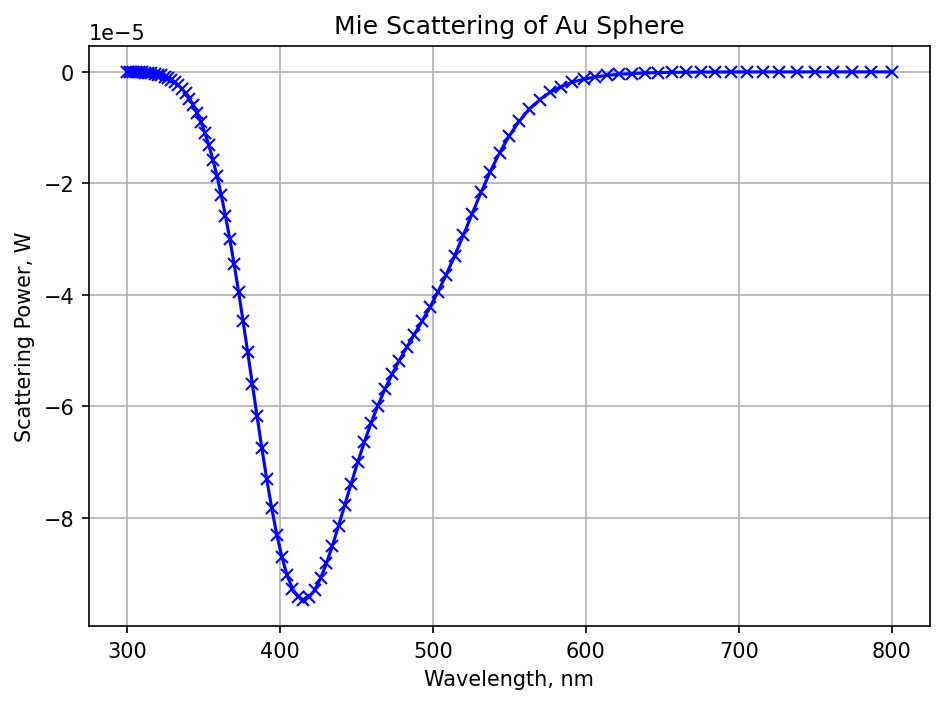

In [3]:
#Plot the scattering efficiency against the spectrum of frequencies we sent toward the sphere:

plt.figure(dpi=150) #dpi is dots per inch. Just changes the resolution of the image of the plot.

#We'll plot wavelength.
#We'll also use a logged scale for both x and y axes (loglog).
plt.plot(1E3/np.asarray(freqs), scatt_flux, "bx-")
plt.grid(True, which="both", ls="-")
plt.xlabel("Wavelength, nm")
plt.ylabel("Scattering Power, W")
plt.title("Mie Scattering of Au Sphere")
plt.tight_layout()
plt.savefig(fname="Mie Scattering of a Au Sphere, single",
            dpi=150, 
            bbox_inches="tight")
plt.show()